In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
from openpyxl import load_workbook
from openpyxl.styles import Font
from openpyxl.chart import BarChart, Reference
import string

# Make a Pivot Table with Pandas

## Read the Excel files

In [6]:
excel_file = pd.read_excel('supermarket_sales.xlsx')
excel_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

#### Filtering some columns

In [9]:
EFilter_File = excel_file[['Gender', 'Product line', 'City', 'Customer type','Total']]
EFilter_File

,Gender,Product line,City,Customer type,Total
0,Female,Health and beauty,Yangon,Member,548.9715
1,Female,Electronic accessories,Naypyitaw,Normal,80.2200
2,Male,Home and lifestyle,Yangon,Normal,340.5255
3,Male,Health and beauty,Yangon,Member,489.0480
4,Male,Sports and travel,Yangon,Normal,634.3785
...,...,...,...,...,...
995,Male,Health and beauty,Naypyitaw,Normal,42.3675
996,Female,Home and lifestyle,Mandalay,Normal,1022.4900
997,Male,Food and beverages,Yangon,Member,33.4320
998,Male,Home and lifestyle,Yangon,Normal,69.1110


## Make a pivot table

In [14]:
report_table = excel_file.pivot_table(index=['Gender', 'Customer type'],
                                      columns='Product line',
                                      values='Total',
                                      aggfunc='sum').round(0)
report_table


Product line          Electronic accessories  Fashion accessories  \
Gender Customer type                                                
Female Member                        11154.0              15123.0   
       Normal                        15948.0              15315.0   
Male   Member                        13345.0              11201.0   
       Normal                        13891.0              12667.0   

Product line          Food and beverages  Health and beauty  \
Gender Customer type                                          
Female Member                    19599.0             8379.0   
       Normal                    13572.0            10182.0   
Male   Member                    11759.0            17452.0   
       Normal                    11215.0            13181.0   

Product line          Home and lifestyle  Sports and travel  
Gender Customer type                                         
Female Member                    17234.0            16658.0  
       Normal                    12803.0            11917.0  
Male   Member                    10744.0            11576.0  
       Normal                    13081.0            14972.0

## Exporting pivot table to Excel file

In [15]:
report_table.to_excel('report_2021.xlsx',
                      sheet_name='Report',
                      startrow=4)

# Make The Report with Openpyxl

## Creating row and column reference

In [16]:
wb = load_workbook('report_2021.xlsx')
sheet = wb['Report']

# cell references (original spreadsheet) 
min_column = wb.active.min_column
max_column = wb.active.max_column
min_row = wb.active.min_row
max_row = wb.active.max_row

print(f'Min Columns: {min_column}')
print(f'Max Columns: {max_column}')
print(f'Min Rows: {min_row}')
print(f'Max Rows: {max_row}')

Min Columns: 1
Max Columns: 8
Min Rows: 5
Max Rows: 9


## Adding Excel charts through Python

In [18]:
wb = load_workbook('report_2021.xlsx')
sheet = wb['Report']
# barchart
barchart = BarChart()
#locate data and categories
data = Reference(sheet,
                 min_col=min_column+1,
                 max_col=max_column,
                 min_row=min_row,
                 max_row=max_row) #including headers
categories = Reference(sheet,
                       min_col=min_column,
                       max_col=min_column,
                       min_row=min_row+1,
                       max_row=max_row) #not including headers
# adding data and categories
barchart.add_data(data, titles_from_data=True)
barchart.set_categories(categories)
#location chart
sheet.add_chart(barchart, "B12")
barchart.title = 'Sales by Product line'
barchart.style = 5 #choose the chart style
wb.save('report_2021.xlsx')

### Same chart here with matplotlib 

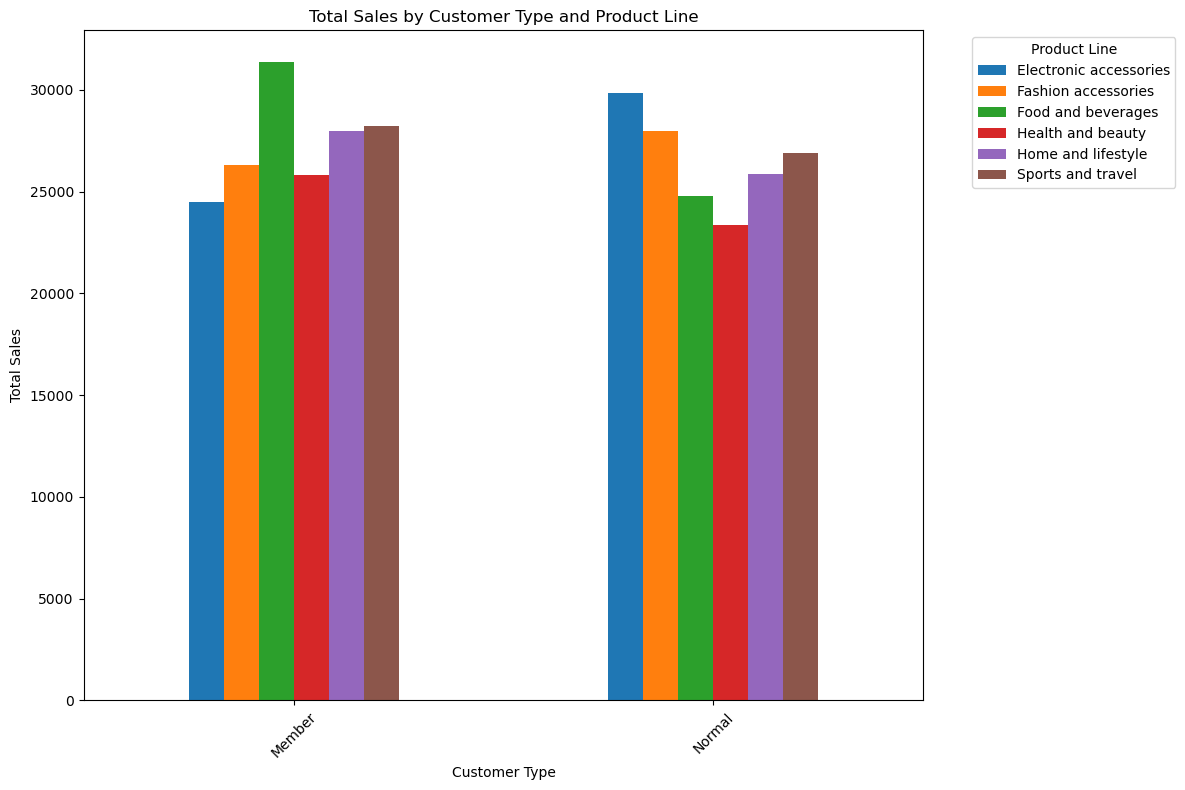

In [26]:
# Crear un DataFrame pivote para agrupar por 'Customer type' y 'Product line' y obtener el valor 'Total'
pivot_table = excel_file.pivot_table(index='Customer type', columns='Product line', values='Total', aggfunc='sum')

# Crear un gráfico de barras agrupadas
pivot_table.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Customer Type and Product Line')
plt.xticks(rotation=45)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


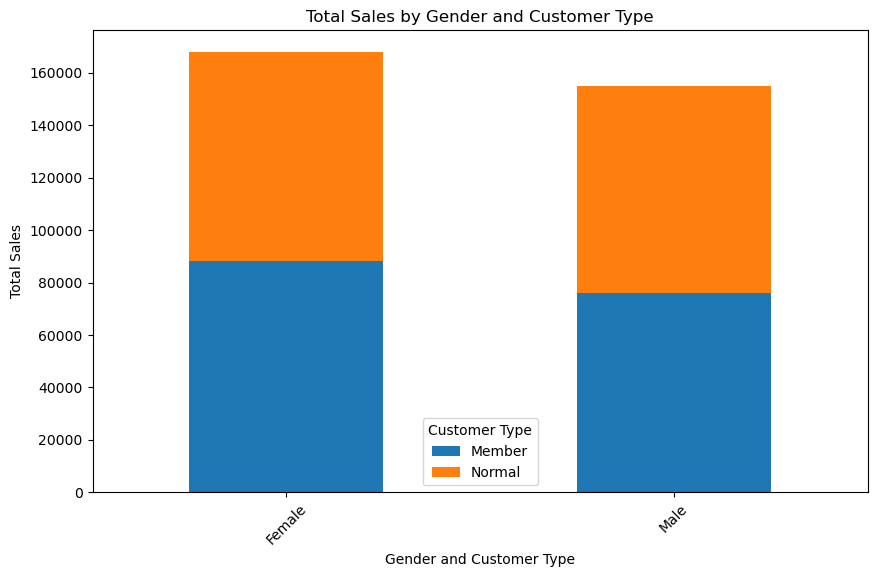

In [27]:
# Crear una tabla pivote para resumir los datos
pivot_table = excel_file.pivot_table(index=['Gender', 'Customer type'], values='Total', aggfunc='sum')

# Reorganizar los datos para que 'Gender' y 'Customer type' estén en el índice
pivot_table = pivot_table.unstack()

# Crear un gráfico de barras apiladas
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Gender and Customer Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Gender and Customer Type')
plt.legend(title='Customer Type', labels=pivot_table.columns.get_level_values(1))
plt.xticks(rotation=45)
plt.show()

### Applying formulas with cell references

In [28]:
import string
alphabet = list(string.ascii_uppercase)
excel_alphabet = alphabet[0:max_column] #note: Python lists start on 0 -> A=0, B=1, C=2. #note2 the [a:b] takes b-a elements
excel_alphabet

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

In [29]:
wb = load_workbook('report_2021.xlsx')
sheet = wb['Report']
# sum in columns B-G
for i in excel_alphabet:
    if i!='A':
        sheet[f'{i}{max_row+1}'] = f'=SUM({i}{min_row+1}:{i}{max_row})'
        sheet[f'{i}{max_row+1}'].style = 'Currency'

# adding total label
sheet[f'{excel_alphabet[0]}{max_row+1}'] = 'Total'
wb.save('report_2021.xlsx')

## Formatting the report sheet

In [10]:
wb = load_workbook('report_2021.xlsx')
sheet = wb['Report']

sheet['A1'] = 'Sales Report'
sheet['A2'] = '2021'
sheet['A1'].font = Font('Arial', bold=True, size=20)
sheet['A2'].font = Font('Arial', bold=True, size=10)

wb.save('report_2021.xlsx')

# Automating the Report with a Python Function

In [33]:
import pandas as pd
import openpyxl
from openpyxl import load_workbook
from openpyxl.styles import Font
from openpyxl.chart import BarChart, Reference
import string

def automate_excel(file_name):
    """The file name should have the following structure: sales_month.xlsx"""
    # read excel file
    excel_file = pd.read_excel(file_name)
    # make pivot table
    report_table = excel_file.pivot_table(index='Gender', columns='Product line', values='Total', aggfunc='sum').round(0)
    # splitting the month and extension from the file name
    month_and_extension = file_name.split('_')[1]
    # send the report table to excel file
    report_table.to_excel(f'report_{month_and_extension}', sheet_name='Report', startrow=4)
    # loading workbook and selecting sheet
    wb = load_workbook(f'report_{month_and_extension}')
    sheet = wb['Report']
    # cell references (original spreadsheet)
    min_column = wb.active.min_column
    max_column = wb.active.max_column
    min_row = wb.active.min_row
    max_row = wb.active.max_row
    # adding a chart
    barchart = BarChart()
    data = Reference(sheet, min_col=min_column+1, max_col=max_column, min_row=min_row, max_row=max_row) #including headers
    categories = Reference(sheet, min_col=min_column, max_col=min_column, min_row=min_row+1, max_row=max_row) #not including headers
    barchart.add_data(data, titles_from_data=True)
    barchart.set_categories(categories)
    sheet.add_chart(barchart, "B12") #location chart
    barchart.title = 'Sales by Product line'
    barchart.style = 2 #choose the chart style
    # applying formulas
    # first create alphabet list as references for cells
    alphabet = list(string.ascii_uppercase)
    excel_alphabet = alphabet[0:max_column] #note: Python lists start on 0 -> A=0, B=1, C=2. #note2 the [a:b] takes b-a elements
    # sum in columns B-G
    for i in excel_alphabet:
        if i!='A':
            sheet[f'{i}{max_row+1}'] = f'=SUM({i}{min_row+1}:{i}{max_row})'
            sheet[f'{i}{max_row+1}'].style = 'Currency'
    sheet[f'{excel_alphabet[0]}{max_row+1}'] = 'Total'
    # getting month name
    month_name = month_and_extension.split('.')[0]
    # formatting the report
    sheet['A1'] = 'Sales Report'
    sheet['A2'] = month_name.title()
    sheet['A1'].font = Font('Arial', bold=True, size=20)
    sheet['A2'].font = Font('Arial', bold=True, size=10)
    wb.save(f'report_{month_and_extension}')
    return 

## Applying the function to a single Excel file

In [36]:
automate_excel('sales_2021.xlsx')

## Applying the function to multiple Excel files

In [37]:
# option 1: apply the formula one by one to get 3 reports
automate_excel('sales_january.xlsx')
automate_excel('sales_february.xlsx')
automate_excel('sales_march.xlsx')

In [38]:
# option 2: concatenate them first using pd.concat() and then apply the function only once.
excel_file_1 = pd.read_excel('sales_january.xlsx')
excel_file_2 = pd.read_excel('sales_february.xlsx')
excel_file_3 = pd.read_excel('sales_march.xlsx')

new_file = pd.concat([excel_file_1,
                      excel_file_2,
                      excel_file_3], ignore_index=True)
new_file.to_excel('sales_2021.xlsx')
automate_excel('sales_2021.xlsx')